# Crimes in Boston

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_excel("crime.xlsx")
df.shape

(128943, 17)

### Exploratory Data Analysis

In [3]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128943 entries, 0 to 128942
Data columns (total 17 columns):
INCIDENT_NUMBER        128943 non-null object
OFFENSE_CODE           128943 non-null int64
OFFENSE_CODE_GROUP     128943 non-null object
OFFENSE_DESCRIPTION    128943 non-null object
DISTRICT               127937 non-null object
REPORTING_AREA         128943 non-null object
SHOOTING               438 non-null object
OCCURRED_ON_DATE       128943 non-null datetime64[ns]
YEAR                   128943 non-null int64
MONTH                  128943 non-null int64
DAY_OF_WEEK            128943 non-null object
HOUR                   128943 non-null int64
UCR_PART               128906 non-null object
STREET                 126581 non-null object
Lat                    120431 non-null float64
Long                   120431 non-null float64
Location               128943 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 16.7+ MB


In [5]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,128943.000000,128943.000000,128943.000000,128943.000000,120431.000000,120431.000000
mean,2355.281217,2017.506573,6.652505,13.101603,42.175408,-70.845625
std,1177.543769,0.504698,2.989632,6.285563,2.517510,4.072400
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2017.000000,5.000000,9.000000,42.296916,-71.097466
50%,3006.000000,2018.000000,7.000000,14.000000,42.325610,-71.077665
75%,3201.000000,2018.000000,9.000000,18.000000,42.348624,-71.062497
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [6]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [7]:
df['Lat'].fillna(value = 0, inplace = True)
df['Long'].fillna(value = 0, inplace = True)

In [8]:
df['UCR_PART'].value_counts()

Part Three    66788
Part Two      37923
Part One      23660
Other           535
Name: UCR_PART, dtype: int64

In [9]:
df['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

In [10]:
df['UCR_PART'].fillna(value = "NaN", inplace = True)

In [11]:
ucr = df.groupby("UCR_PART")

In [12]:
df[df['UCR_PART'] == 'NaN']['OFFENSE_CODE'].unique()

array([2010, 3115, 1610], dtype=int64)

as we can see that df['UCR_PART'] has 3 values in column OFFENSE_CODE.
Hence we will now check visa-versa for these 3 values in column OFFENSE_CODE, what value it has in column UCR_PART

In [13]:
df[df['OFFENSE_CODE'] == 2010]['UCR_PART'].unique()

array(['NaN'], dtype=object)

In [14]:
df[df['OFFENSE_CODE'] == 3115]['UCR_PART'].unique()

array(['Part Three', 'NaN'], dtype=object)

In [15]:
df[df['OFFENSE_CODE'] == 1610]['UCR_PART'].unique()

array(['NaN'], dtype=object)

as we can see only Part Three for above 3 values so we are imputing that value in NaN cell of UCR_PART column.

In [16]:
df['UCR_PART'].fillna(value = "Part Three", inplace = True)

In [17]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [18]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [19]:
df['SHOOTING'].fillna(value = "N", inplace = True)

In [20]:
df['OFFENSE_CODE_GROUP'].nunique()

65

In [21]:
df['OFFENSE_DESCRIPTION'].nunique()

186

In [22]:
table = pd.pivot_table(df, index = ['DAY_OF_WEEK'], values = ['UCR_PART'], aggfunc= np.count_nonzero)
table

,UCR_PART
DAY_OF_WEEK,
Friday,19658
Monday,18207
Saturday,18149
Sunday,16271
Thursday,19009
Tuesday,18639
Wednesday,19010


In [23]:
df.groupby('UCR_PART')['SHOOTING'].value_counts()

UCR_PART    SHOOTING
NaN         N              35
            Y               2
Other       N             534
            Y               1
Part One    N           23389
            Y             271
Part Three  N           66708
            Y              80
Part Two    N           37839
            Y              84
Name: SHOOTING, dtype: int64

In [24]:
df.groupby('UCR_PART')['YEAR'].value_counts()

UCR_PART    YEAR
NaN         2017       21
            2018       16
Other       2017      273
            2018      261
            2015        1
Part One    2018    11819
            2017    11812
            2016       25
            2015        4
Part Three  2018    33985
            2017    32746
            2016       51
            2015        6
Part Two    2018    19504
            2017    18281
            2016      108
            2015       30
Name: YEAR, dtype: int64

In [25]:
df.groupby('YEAR')['SHOOTING'].value_counts()

YEAR  SHOOTING
2015  N              41
2016  N             184
2017  N           62880
      Y             253
2018  N           65400
      Y             185
Name: SHOOTING, dtype: int64

In [26]:
df.groupby('DAY_OF_WEEK')['SHOOTING'].value_counts()

DAY_OF_WEEK  SHOOTING
Friday       N           19596
             Y              62
Monday       N           18159
             Y              48
Saturday     N           18051
             Y              98
Sunday       N           16193
             Y              78
Thursday     N           18964
             Y              45
Tuesday      N           18594
             Y              45
Wednesday    N           18948
             Y              62
Name: SHOOTING, dtype: int64

Shooting cases began from 2017 onwards and maximum cases of shooting happens on Saturday. 

In [27]:
df['REPORTING_AREA'].nunique()

878

In [28]:
df['DISTRICT'].nunique()

12

####  None of the column(DISTRICT, REPORTING_AREA, STREET, Location ) matters, as we have lattitude and longitude columns..


####  None of the columns (OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION ) matters, as we have OFFENSE_CODE column..

#### making of relevant columns dataset

In [29]:
shoot = pd.get_dummies(df["SHOOTING"],drop_first= True)
shoot.head(2)

,Y
0,0
1,0


In [30]:
year = pd.get_dummies(df["YEAR"],drop_first= True)
year.head(2)

,2016,2017,2018
0,0,0,1
1,0,0,1


In [31]:
month = pd.get_dummies(df["MONTH"],drop_first= True)
month.head(2)

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0


In [32]:
day = pd.get_dummies(df["DAY_OF_WEEK"],drop_first= True)
day.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,0,0,0,0,1,0


In [33]:
df.drop(['INCIDENT_NUMBER', "OFFENSE_CODE", "SHOOTING", 'YEAR', 'MONTH', 'DAY_OF_WEEK',
         "OFFENSE_CODE_GROUP", "OFFENSE_DESCRIPTION", "DISTRICT", "REPORTING_AREA", "OCCURRED_ON_DATE", 
         "STREET", "Location"], inplace =True, axis = 1)

In [34]:
df.head(2)

,HOUR,UCR_PART,Lat,Long
0,13,Part One,42.357791,-71.139371
1,0,Part Two,42.306821,-71.060300


In [35]:
df_new = df[['HOUR', "Lat", "Long", "UCR_PART"]]

In [36]:
df_new.head()

,HOUR,Lat,Long,UCR_PART
0,13,42.357791,-71.139371,Part One
1,0,42.306821,-71.060300,Part Two
2,19,42.346589,-71.072429,Part Three
3,21,42.334182,-71.078664,Part Three
4,21,42.275365,-71.090361,Part Three


In [37]:
df_final = pd.concat([df_new, shoot, year, month, day], axis = 1,ignore_index = True)

In [38]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,13,42.357791,-71.139371,Part One,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,42.306821,-71.060300,Part Two,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,19,42.346589,-71.072429,Part Three,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,21,42.334182,-71.078664,Part Three,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,21,42.275365,-71.090361,Part Three,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [40]:
df_final.columns = ["HOUR", "Lat", "Long", "UCR_PART", "Y", "2016", "2017", "2018", "M2", "M3", "M4", "M5", "M6", "M7", 
                    "M8", "M9", "M10", "M11", "M12", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

In [41]:
df_final.columns

Index(['HOUR', 'Lat', 'Long', 'UCR_PART', 'Y', '2016', '2017', '2018', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### training and testing using Logistic Regression Model on column UCR_PART

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

We are taking SHOOTING as "Y" column as target and rest of them as predictors

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
df_final['UCR_PART'] = le.fit_transform(df_final['UCR_PART'])

In [67]:
"""
x = df_final.drop(["Y"], axis = 1)
y = df_final["Y"]
"""

'\nx = df_final.drop(["Y"], axis = 1)\ny = df_final["Y"]\n'

In [68]:
"""
x = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12"], axis = 1)
y = df_final["Y"]
"""

'\nx = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12"], axis = 1)\ny = df_final["Y"]\n'

In [69]:
"""
x = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018"], axis = 1)
y = df_final["Y"]
"""

'\nx = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018"], axis = 1)\ny = df_final["Y"]\n'

In [70]:
x = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018", "HOUR"], axis = 1)
y = df_final["Y"]

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [72]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
predict = model.predict(xtest)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [75]:
print(accuracy_score(ytest, predict))
print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))

0.9945713288611423
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25714
           1       0.13      0.15      0.14        75

    accuracy                           0.99     25789
   macro avg       0.56      0.57      0.57     25789
weighted avg       0.99      0.99      0.99     25789

[[25638    76]
 [   64    11]]


In [76]:
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(ytest, probs)
auc

0.6314505716730187

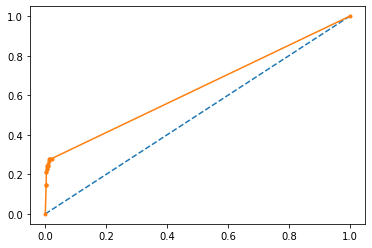

In [77]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytest, probs)

plt.plot([0, 1], [0, 1], linestyle='--')   #plt.plot(x, y)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

We are taking UCR_PART column as target and rest of them as predictors

## be carefule with UCR_PART column. DON'T CONVERT IT USING LABELENCODER. then continue

In [48]:
x = df_final.drop(["UCR_PART", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018", "HOUR"], axis = 1)
y = df_final["UCR_PART"]

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [50]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
predict = model.predict(xtest)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
print(accuracy_score(ytest, predict))
print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))

0.4779169413315755
              precision    recall  f1-score   support

         NaN       0.00      0.00      0.00        11
       Other       0.04      0.06      0.04        88
    Part One       0.29      0.34      0.31      4669
  Part Three       0.58      0.64      0.61     13426
    Part Two       0.39      0.28      0.32      7595

    accuracy                           0.48     25789
   macro avg       0.26      0.26      0.26     25789
weighted avg       0.47      0.48      0.47     25789

[[   0    0    3    5    3]
 [   0    5   30   42   11]
 [   0   31 1572 2128  938]
 [   0   65 2320 8628 2413]
 [   2   40 1408 4025 2120]]


In [54]:
acc = (46 + 13411 + 0)/25789
acc

0.5218116251114816